In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-dataset/books_data/ratings.csv
/kaggle/input/books-dataset/books_data/users.csv
/kaggle/input/books-dataset/books_data/books.csv


In [2]:
# Load the library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/books-dataset/books_data/ratings.csv
/kaggle/input/books-dataset/books_data/users.csv
/kaggle/input/books-dataset/books_data/books.csv


In [4]:
#Load the dataset
Books_df = pd.read_csv('/kaggle/input/books-dataset/books_data/books.csv', sep =';', encoding='latin1', on_bad_lines='skip', low_memory = False)
Users_df = pd.read_csv('/kaggle/input/books-dataset/books_data/users.csv', sep =';', encoding='latin1', on_bad_lines='skip', low_memory = False)
Ratings_df = pd.read_csv('/kaggle/input/books-dataset/books_data/ratings.csv', sep =';', encoding='latin1', on_bad_lines='skip', low_memory = False)

In [5]:
Books_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [6]:
#Drop these columns
Books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [7]:
# Display the first 5 rows
Books_df.head(5)

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                2002     Oxford University Press  
1  Richard Bruce Wright                2001       HarperFlamingo Canada  
2          Carlo D'Este                1991             HarperPerennial  
3      Gina Bari Kolata                1999        Farrar Straus Giroux  
4       E. J. W. Barber                1999  W. W. Norton &amp; Company

In [8]:
Users_df.head(5)

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [9]:
Ratings_df.head(5)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [10]:
Books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


Data Cleaning and Preparation

In [11]:
# Handle missing values in Book-Author column
Books_df.loc[:, 'Book-Author'] = Books_df['Book-Author'].fillna('Unknown')

In [12]:
# Extract genre information from Book-Title column
import re
Books_df['Genre'] = Books_df['Book-Title'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else 'Unknown')

In [13]:
# Drop rows with missing values in Year-Of-Publication column
Books_df.dropna(subset=['Year-Of-Publication'], inplace=True)

In [14]:
# Convert Year-Of-Publication column to datetime format
Books_df['Year-Of-Publication'] = pd.to_datetime(Books_df['Year-Of-Publication'], errors='coerce')

In [15]:
Books_df.head(5)

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford          2002-01-01     Oxford University Press   
1  Richard Bruce Wright          2001-01-01       HarperFlamingo Canada   
2          Carlo D'Este          1991-01-01             HarperPerennial   
3      Gina Bari Kolata          1999-01-01        Farrar Straus Giroux   
4       E. J. W. Barber          1999-01-01  W. W. Norton &amp; Company   

     Genre  
0  Unknown  
1  Unknown  
2  Unknown  
3  Unknown  
4  Unknown

Analyze Popular Genres

In [16]:
# Count the number of books in each genre
genre_counts = Books_df['Genre'].value_counts()
print(genre_counts)

Genre
Unknown                                               195886
Penguin Classics                                         564
Dover Thrift Editions                                    374
Zebra Regency Romance                                    277
Signet Regency Romance                                   263
                                                       ...  
His Conquering Sword                                       1
Sweetwater Gunslinger                                      1
Dancing Gods Part 1                                        1
Thorndike Press Large Print Science Fiction Series         1
The Case For Taste                                         1
Name: count, Length: 40823, dtype: int64


In [17]:
fiction_genres = ['Fiction', 'Science Fiction', 'Fantasy', 'Thriller']
Books_df['Fiction'] = Books_df['Genre'].apply(lambda x: x in fiction_genres)

In [18]:
fiction_books = Books_df[Books_df['Fiction'] == True]
non_fiction_books = Books_df[Books_df['Fiction'] == False]

In [19]:
# Count the number of fiction and non-fiction books
fiction_count = len(fiction_books)
non_fiction_count = len(non_fiction_books)

print("Fiction Books:", fiction_count)
print("Non-Fiction Books:", non_fiction_count)

Fiction Books: 15
Non-Fiction Books: 271345


In [20]:
Fiction_books = Books_df[Books_df['Genre'] == 'Fiction']
print(Fiction_books)

              ISBN                                         Book-Title  \
6896    0889951926                          A Fine Daughter (Fiction)   
13960   0889951853                    Restlessness: A Novel (Fiction)   
31213   0689713703                          Caddie Woodlawn (Fiction)   
35900   0889951322  Yellow Pages: A Catalogue of Intentions (Fiction)   
61747   0889952183  It's So Cold on the Prairies: Wit &amp; Wisdom...   
85875   088995092X              The Substance of Forgetting (Fiction)   
90440   0609607944                           Cold : A Novel (Fiction)   
154308  0689815212                          Caddie Woodlawn (Fiction)   
169851  0889951063   Beneath the Faceless Mountain: A Novel (Fiction)   
234717  0889952280                          The Kappa Child (Fiction)   
260509  044041184X                         The Broken Blade (Fiction)   

                    Book-Author Year-Of-Publication             Publisher  \
6896    Catherine Simmons Niven          1999-

In [21]:
romance_books = Books_df[Books_df['Genre'] == 'Romance']
print(romance_books)

              ISBN                                         Book-Title  \
46896   0263795128                         The Right Choice (Romance)   
99754   0263124991                 An answer from the heart (Romance)   
99999   0263790576                        A Stranger's Love (Romance)   
174392  0373038151  The Husband Sweepstake : What Women Want! (Rom...   
174406  0373038178            The Billionaire Takes A Bride (Romance)   
174409  0373038186                     The Wedding Contract (Romance)   
174413  037303816X                         His Pretend Wife (Romance)   
174613  0373038089       The Baby Proposal : Ready For Baby (Romance)   
174617  0373038070  Gino's Arranged Bride : The Italian Brothers (...   
174620  0373038100                 The Tycoon's Dating Deal (Romance)   
174626  0373038097  A Convenient Groom : The Wedding Planners (Rom...   
175524  0312966113                    Memories of the Heart (Romance)   
224225  0263790568                          A Capti

In [22]:
# Count the number of fiction and non-fiction books
romance_count = len(romance_books)
fiction_count = len(fiction_books)
# Print the results
print("Romance Books:", romance_count)
print("Fiction Books:", fiction_count)

Romance Books: 16
Fiction Books: 15


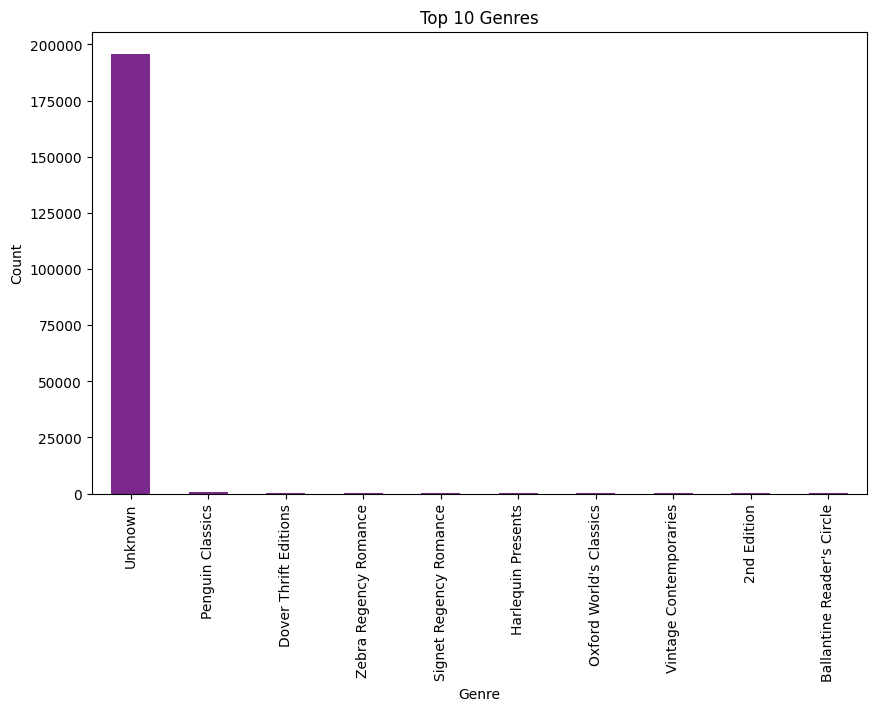

In [23]:
# Plot the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='#7A288A')  # Violet color
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

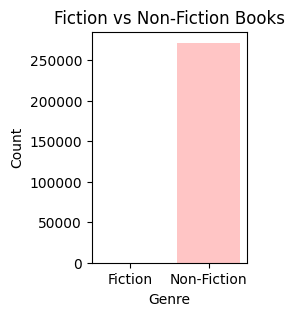

In [24]:
# Plot the fiction and non-fiction counts
plt.figure(figsize=(2, 3))
plt.bar(['Fiction', 'Non-Fiction'], [fiction_count, non_fiction_count], 
        color=['#7A288A', '#FFC5C5'])  # Violet and pink colors
plt.title('Fiction vs Non-Fiction Books')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

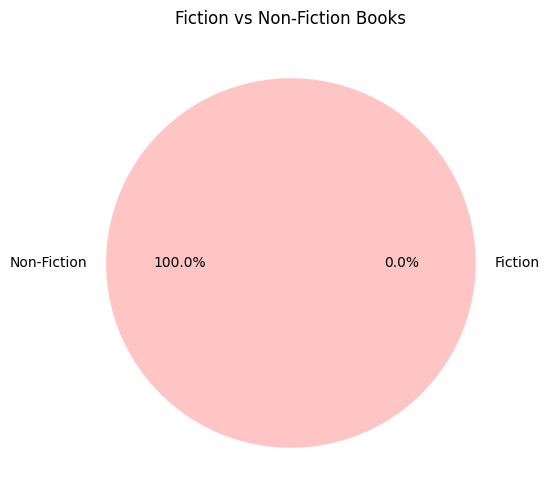

In [25]:
# Plot the fiction and non-fiction proportions
plt.figure(figsize=(8, 6))
plt.pie([fiction_count, non_fiction_count], labels=['Fiction', 'Non-Fiction'], 
        colors=['#7A288A', '#FFC5C5'], autopct='%1.1f%%')
plt.title('Fiction vs Non-Fiction Books')
plt.show()

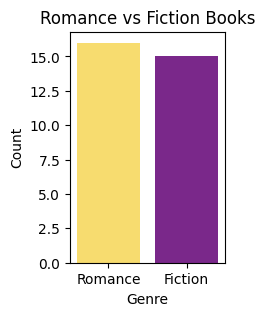

In [26]:
import matplotlib.pyplot as plt

# Plot the Romance and Fiction counts
plt.figure(figsize=(2, 3))
plt.bar(['Romance', 'Fiction'], [romance_count, fiction_count], 
        color=['#F7DC6F','#7A288A'])  # Yellow and violet colors
plt.title('Romance vs Fiction Books')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

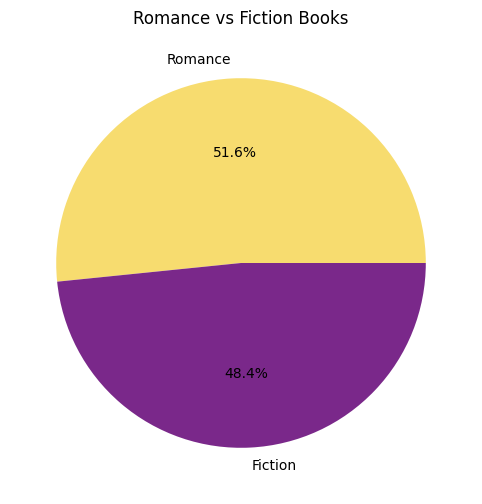

In [27]:
# Plot the Romance and Fiction proportions
plt.figure(figsize=(8, 6))
plt.pie([romance_count, fiction_count], labels=['Romance', 'Fiction'], 
        colors=['#F7DC6F', '#7A288A'], autopct='%1.1f%%')
plt.title('Romance vs Fiction Books')
plt.show()

Analyze the download trends over time.

In [28]:
# Merge the Books_df and Ratings_df datasets on ISBN
merged_df = pd.merge(Books_df, Ratings_df, on='ISBN')

In [29]:
merged_df.head(5)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford          2002-01-01   
1  0002005018         Clara Callan  Richard Bruce Wright          2001-01-01   
2  0002005018         Clara Callan  Richard Bruce Wright          2001-01-01   
3  0002005018         Clara Callan  Richard Bruce Wright          2001-01-01   
4  0002005018         Clara Callan  Richard Bruce Wright          2001-01-01   

                 Publisher    Genre  Fiction  User-ID  Book-Rating  
0  Oxford University Press  Unknown    False        2            0  
1    HarperFlamingo Canada  Unknown    False        8            5  
2    HarperFlamingo Canada  Unknown    False    11400            0  
3    HarperFlamingo Canada  Unknown    False    11676            8  
4    HarperFlamingo Canada  Unknown    False    41385            0

In [30]:
# Group the data by Year-Of-Publication and calculate the average Book-Rating
download_trends = merged_df.groupby('Year-Of-Publication')['Book-Rating'].mean()
print(download_trends)

Year-Of-Publication
1806-01-01     5.000000
1897-01-01     0.000000
1900-01-01     1.750000
1901-01-01     4.571429
1902-01-01     1.800000
                ...    
2026-01-01     4.800000
2030-01-01     3.031250
2037-01-01    10.000000
2038-01-01     2.375000
2050-01-01     4.857143
Name: Book-Rating, Length: 113, dtype: float64


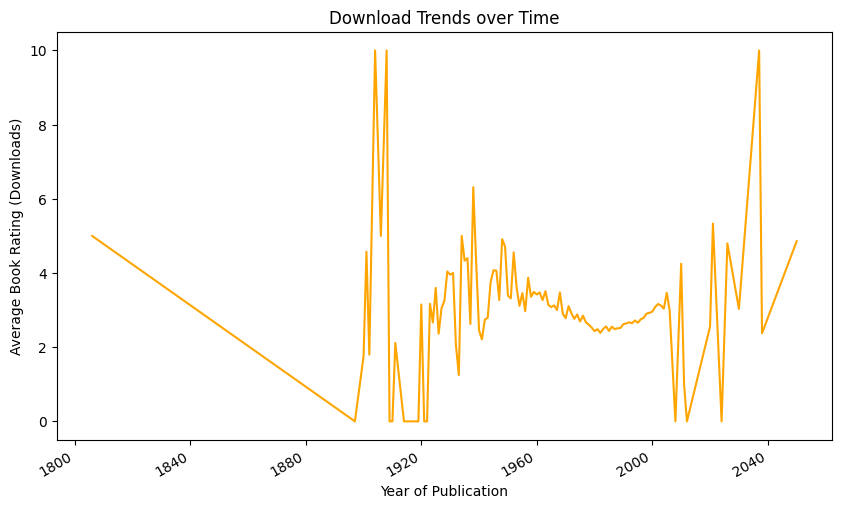

In [31]:
# Plot the download trends over time
plt.figure(figsize=(10, 6))
download_trends.plot(kind='line', color='orange')
plt.title('Download Trends over Time')
plt.xlabel('Year of Publication')
plt.ylabel('Average Book Rating (Downloads)')
plt.show()

Analyze Fiction vs. Non-Fiction Trends


In [32]:
# Create a new column to indicate whether a book is fiction or non-fiction
Books_df['Fiction'] = Books_df['Genre'].apply(lambda x: 1 if x in ['Fiction', 'Novel', 'Romance'] else 0)

In [33]:
# Group the data by Year-Of-Publication and Fiction, and calculate the average Book-Rating
fiction_trends = merged_df.groupby(['Year-Of-Publication', 'Fiction'])['Book-Rating'].mean()
print(fiction_trends)

Year-Of-Publication  Fiction
1806-01-01           False       5.000000
1897-01-01           False       0.000000
1900-01-01           False       1.750000
1901-01-01           False       4.571429
1902-01-01           False       1.800000
                                  ...    
2026-01-01           False       4.800000
2030-01-01           False       3.031250
2037-01-01           False      10.000000
2038-01-01           False       2.375000
2050-01-01           False       4.857143
Name: Book-Rating, Length: 123, dtype: float64


<Figure size 1000x600 with 0 Axes>

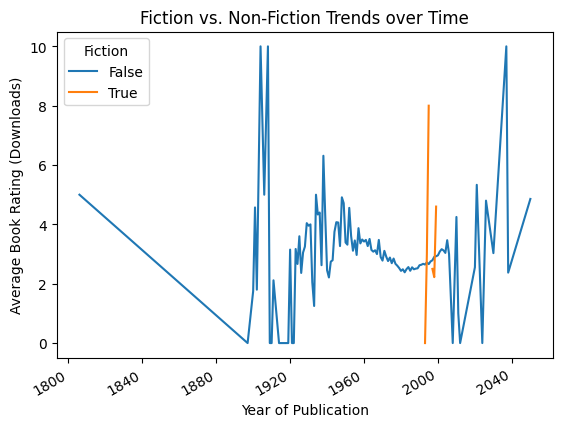

In [34]:
# Plot the fiction vs. non-fiction trends over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fiction_trends.unstack().plot(kind='line')
plt.title('Fiction vs. Non-Fiction Trends over Time')
plt.xlabel('Year of Publication')
plt.ylabel('Average Book Rating (Downloads)')
plt.legend(title='Fiction')
plt.show()

In [35]:
# Extract the Book-Rating column from the merged dataset
ratings = merged_df["Book-Rating"]
print(ratings)

0          0
1          5
2          0
3          8
4          0
          ..
1031131    7
1031132    4
1031133    0
1031134    0
1031135    0
Name: Book-Rating, Length: 1031136, dtype: int64


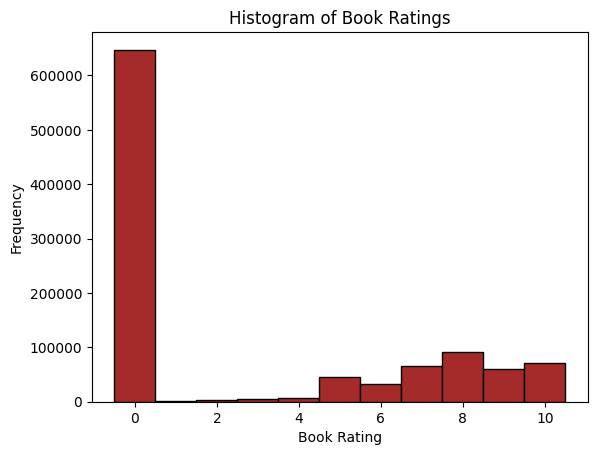

In [36]:
# Histogram
plt.hist(ratings, bins=11, range=(-0.5, 10.5), edgecolor="black", color="brown")

# Add labels and title to the plot
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Book Ratings")

# Display the plot
plt.show()